Richard Pluta

### Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk as nltk
import sklearn as skl
import scipy as scipy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /home/richie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/richie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Question 1
The folder “CSI5810TextFiles” posted on Moodle contains 8 text files. You are to apply text-processing steps including stop word filtering to obtain term-document matrix under Boolean Model. Using this matrix, calculate similarity between all document pairs and show your results in the form of an8x8 matrix.Use Jaccard’s similarity measure.

In [2]:
path = "./CSI5810TextFiles/"
files = [
    open(path + "lyrics1.txt", "r").read().replace("\\n", " "),
    open(path + "lyrics2.txt", "r").read().replace("\\n", " "),
    open(path + "lyrics3.txt", "r").read().replace("\\n", " "),
    open(path + "lyrics4.txt", "r").read().replace("\\n", " "),
    open(path + "rhym1.txt", "r").read().replace("\\n", " "),
    open(path + "rhym2.txt", "r").read().replace("\\n", " "),
    open(path + "rhym3.txt", "r").read().replace("\\n", " "),
    open(path + "rhym4.txt", "r").read().replace("\\n", " ")
]

stopwords = nltk.corpus.stopwords.words()
processed = []

for file in files:
    text = nltk.word_tokenize(file)
    #text = file.split()
    text = [word.lower() for word in text]
    filtered = [word for word in text if not word in stopwords]
    sentence = " ".join(filtered)
    processed.append(sentence)

print(processed)

["yesterday gay , high rainbow , 's rainbow , 've gone , lover blue life sweet , complete , 've suddenly waken find 'm forsaken , alone , lover blue still remember love affair , matter , 'll go everywhere , every scene reminds something binds , lover blue", "funny valentine sweet comic valentine make smile heart looks laughable unphotographable yet 're favorite work art figure less greek ? mouth little weak ? open speak smart ? n't change hair stay little valentine stay day valentines day figure less greek mouth little weak open speak smart ? n't change hair stay little valentine stay day valentines day .", "fly , let 's fly , let 's fly away could use exotic booze 's bar far bombay fly , let 's fly , let 's fly away", 'fill heart song let sing ever long worship adore words , please true words , love', 'twinkle , twinkle , little star , wonder ! world high , like diamond sky !', 'star light , star bright , first star see tonight . wish may , wish might , wish wish tonight .', 'mary lit

In [3]:
data = skl.feature_extraction.text.CountVectorizer()
data = data.fit_transform(processed).toarray()
data = np.where(data > 0, 1, 0)
data = pd.DataFrame(data)

#print(data)

scores = []
for x in range(len(data)):
    for y in range(len(data)):
        scores.append(skl.metrics.jaccard_score(data.iloc[x], data.iloc[y]))
      
scores = np.array(scores)
scores = scores.reshape(8, 8)


print("Jaccard's Similarity Measure:\n", pd.DataFrame(scores).to_markdown())

Jaccard's Similarity Measure:
 |    |         0 |         1 |         2 |         3 |         4 |         5 |         6 |        7 |
|---:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|---------:|
|  0 | 1         | 0.0175439 | 0         | 0.0243902 | 0.027027  | 0         | 0.0540541 | 0        |
|  1 | 0.0175439 | 1         | 0         | 0.0243902 | 0.027027  | 0         | 0.0263158 | 0        |
|  2 | 0         | 0         | 1         | 0.0454545 | 0         | 0         | 0         | 0        |
|  3 | 0.0243902 | 0.0243902 | 0.0454545 | 1         | 0         | 0         | 0         | 0        |
|  4 | 0.027027  | 0.027027  | 0         | 0         | 1         | 0.0588235 | 0.0555556 | 0        |
|  5 | 0         | 0         | 0         | 0         | 0.0588235 | 1         | 0         | 0        |
|  6 | 0.0540541 | 0.0263158 | 0         | 0         | 0.0555556 | 0         | 1         | 0.047619 |
|  7 | 0         | 0         | 0         | 0       

# Question 2

This is a continuation of Exercise #1. In this case, determine the vector space representation for each document and calculate the 8x8 document similarity matrix using Cosine measure of similarity.

In [4]:
scores = []

for x in range(len(data)):
    for y in range(len(data)):
        scores.append(scipy.spatial.distance.cosine(data.iloc[x], data.iloc[y]))
        
scores = np.array(scores)
scores = scores.reshape(8, 8)

print("Cosine Similarity Measure:\n", pd.DataFrame(scores).to_markdown())

Cosine Similarity Measure:
 |    |        0 |        1 |        2 |        3 |        4 |        5 |        6 |        7 |
|---:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
|  0 | 0        | 0.965517 | 1        | 0.948497 | 0.938102 | 1        | 0.882556 | 1        |
|  1 | 0.965517 | 0        | 1        | 0.948497 | 0.938102 | 1        | 0.941278 | 1        |
|  2 | 1        | 1        | 0        | 0.912294 | 1        | 1        | 1        | 1        |
|  3 | 0.948497 | 0.948497 | 0.912294 | 0        | 1        | 1        | 1        | 1        |
|  4 | 0.938102 | 0.938102 | 1        | 1        | 0        | 0.888889 | 0.894591 | 1        |
|  5 | 1        | 1        | 1        | 1        | 0.888889 | 0        | 1        | 1        |
|  6 | 0.882556 | 0.941278 | 1        | 1        | 0.894591 | 1        | 0        | 0.908713 |
|  7 | 1        | 1        | 1        | 1        | 1        | 1        | 0.908713 | 0        |


# Question 3

In this exercise, you will use “Wheat Data” posted at Moodle. The data consists of 32training examples each from three classes. Using these training examples, you will perform classification of 3 test examples by k-NN classification(k= 1, 3, and 5), and by Naïve Bayes classifier. Compare and comment on your results.

In [5]:
data = pd.read_csv("Wheat_Data.csv").astype("float").to_numpy()
classes = [1] * 32 + [2] * 32 + [3] * 32

test = pd.read_csv("Wheat_Data_Test.csv").astype("float").to_numpy()

In [6]:
for i in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data, classes)

    print("k-NN Classification for k=" + str(i) + "\n", knn.predict(test))

k-NN Classification for k=1
 [3 2 3]
k-NN Classification for k=3
 [3 2 3]
k-NN Classification for k=5
 [3 2 3]


In [7]:
nb = GaussianNB()
nb.fit(data, classes)

print("Naive Bayes Classification:\n", nb.predict(test))

Naive Bayes Classification:
 [3 2 3]


The predictions of each k-NN classifier and the Naive Bayes classifier appear to produce the same result. 

# Question 4

In this exercise, you will again use 32 training examples of wheat data and project them into two-dimensions using the Fisher’s LDA method for multiple classes. Next, you will apply PCA on the same 32 examples to reduce the data to two dimensions. You will show your result by creating two scatter plots, one for LDA and the other for PCA. Make sure to color code the project points with their respective class labels.

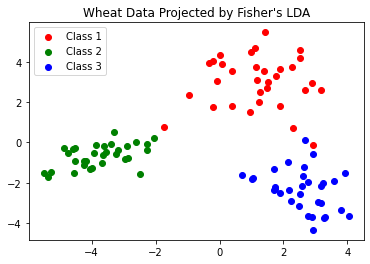

In [8]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(data, classes)
projected = lda.transform(data)

plt.scatter(projected[0:32,0], projected[0:32,1], color="r", label="Class 1")
plt.scatter(projected[32:64,0], projected[32:64,1], color="g", label="Class 2")
plt.scatter(projected[64:96,0], projected[64:96,1], color="b", label="Class 3")
plt.title("Wheat Data Projected by Fisher's LDA")
plt.legend()
plt.show()


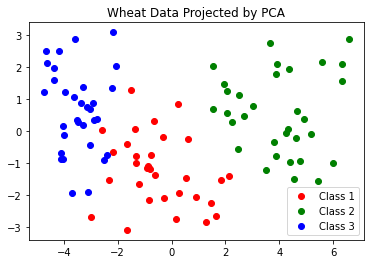

In [9]:

pca = PCA(n_components=2)
pca.fit(data)
projected = pca.transform(data)

plt.scatter(projected[0:32,0], projected[0:32,1], color="r", label="Class 1")
plt.scatter(projected[32:64,0], projected[32:64,1], color="g", label="Class 2")
plt.scatter(projected[64:96,0], projected[64:96,1], color="b", label="Class 3")
plt.title("Wheat Data Projected by PCA")
plt.legend()
plt.show()